<a href="https://colab.research.google.com/github/Architag1503/Colab/blob/main/CarPricePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [3]:
df.shape

(17966, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


# **EDA**

<Axes: xlabel='price', ylabel='Count'>

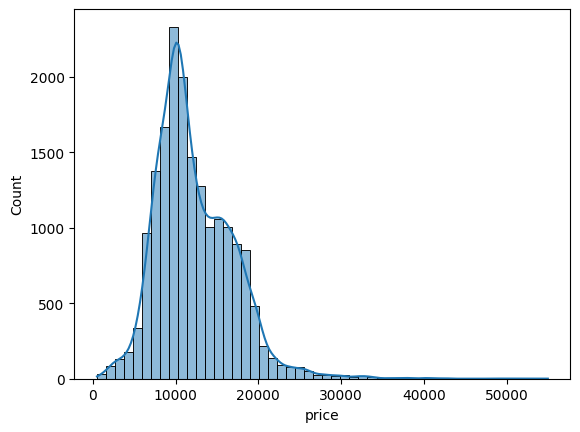

In [9]:
sns.histplot(df["price"] , bins = 50 , kde = True)

<Axes: >

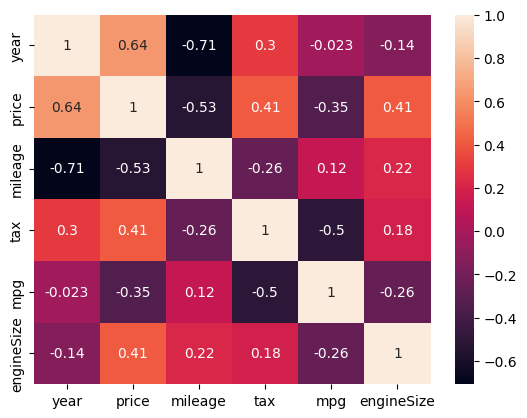

In [12]:
sns.heatmap(df.corr(numeric_only = True) , annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

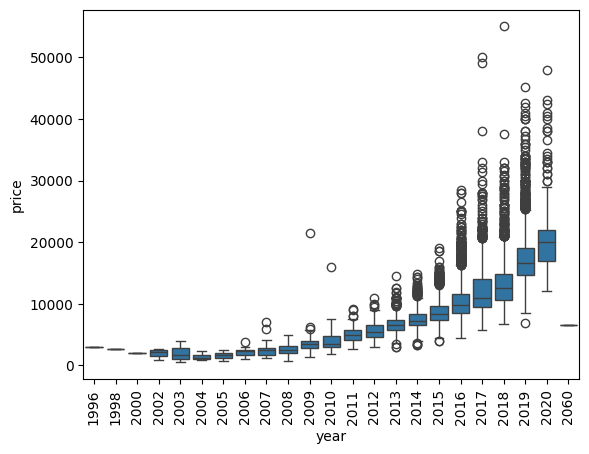

In [19]:
sns.boxplot(x=df['year'] , y = df['price'])
plt.xticks(rotation=90)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 [Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000')])

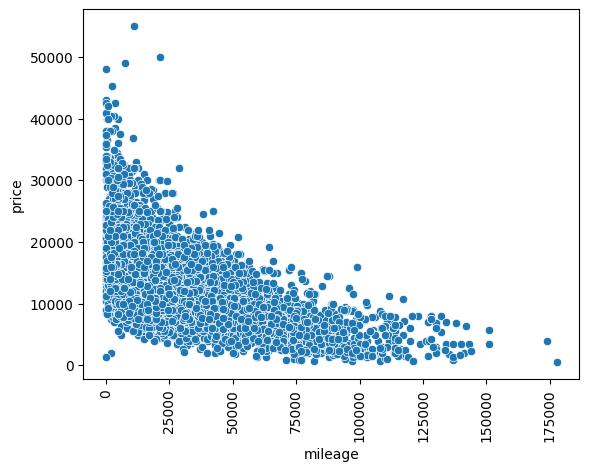

In [21]:
sns.scatterplot(x=df['mileage'] , y = df['price'])
plt.xticks(rotation=90)
#corrrealtion of mileage and price is -0.53 because we can see there negetive slope.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.1'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '1.4'),
  Text(6, 0, '1.5'),
  Text(7, 0, '1.6'),
  Text(8, 0, '1.7'),
  Text(9, 0, '1.8'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.2'),
  Text(12, 0, '2.3'),
  Text(13, 0, '2.5'),
  Text(14, 0, '3.2'),
  Text(15, 0, '5.0')])

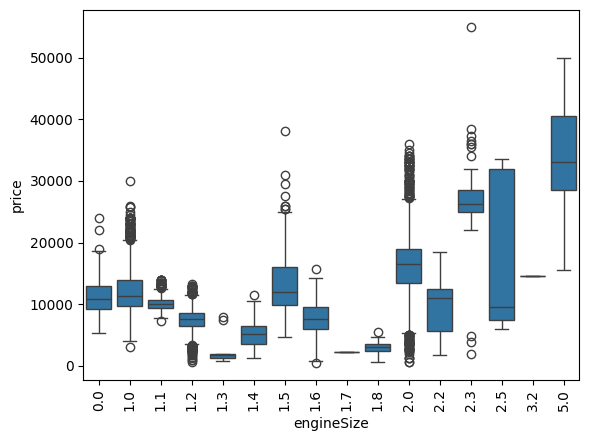

In [22]:
sns.boxplot(x=df['engineSize'] , y = df['price'])
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, 'Automatic'), Text(1, 0, 'Manual'), Text(2, 0, 'Semi-Auto')])

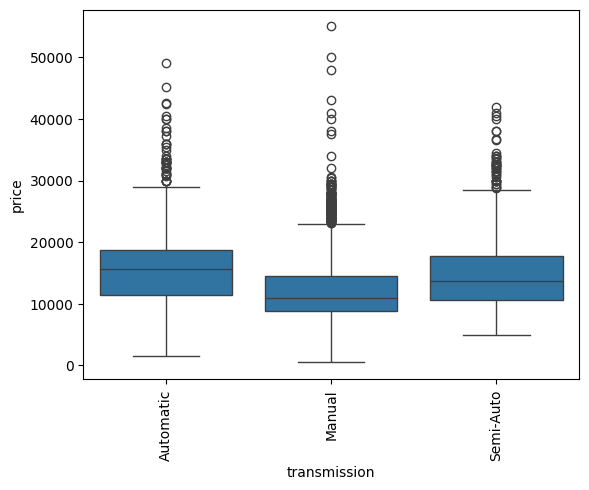

In [23]:
#boxplot is best for categorical data (x-axis = categorical data , y-axis = continous data)
sns.boxplot(x=df['transmission'] , y = df['price'])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Electric'),
  Text(4, 0, 'Other')])

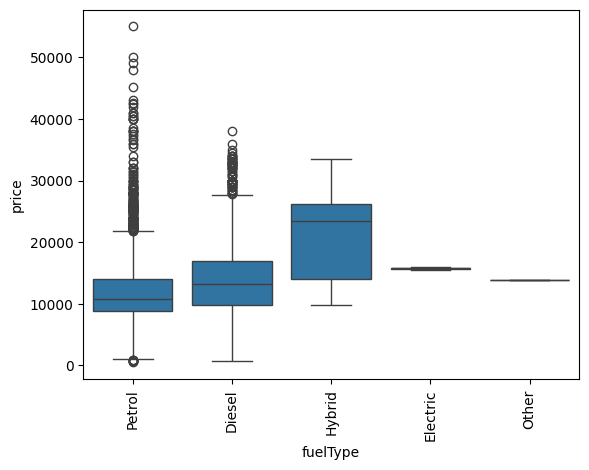

In [24]:
sns.boxplot(x=df['fuelType'] , y = df['price'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

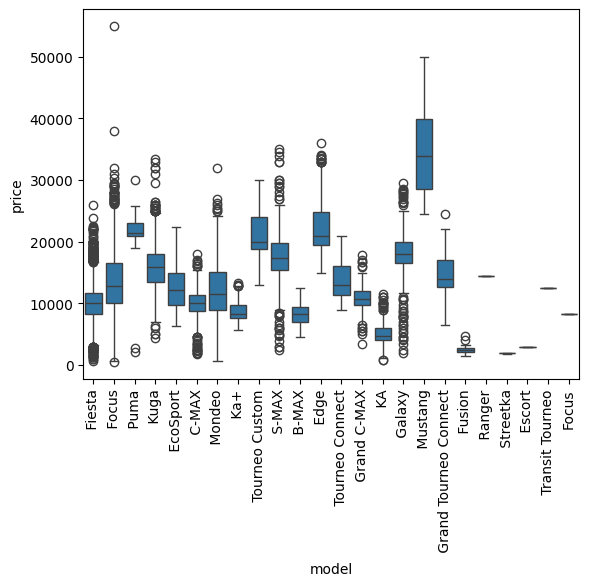

In [26]:
sns.boxplot(x=df['model'] , y = df['price'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

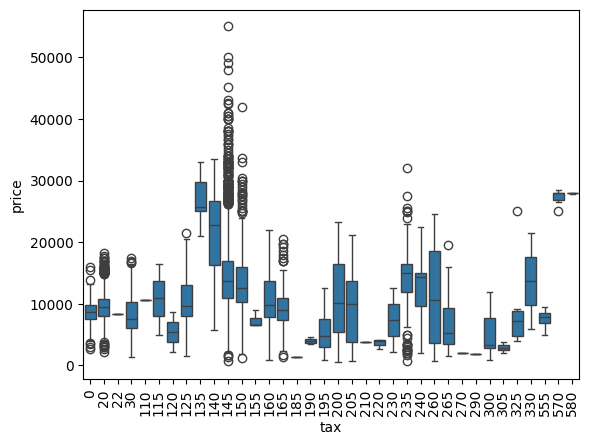

In [27]:
sns.boxplot(x=df['tax'] , y = df['price'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89],
 [Text(0, 0, '20.8'),
  Text(1, 0, '20.9'),
  Text(2, 0, '22.1'),
  Text(3, 0, '22.6'),
  Text(4, 0, '22.8'),
  Text(5, 0, '23.5'),
  Text(6, 0, '23.7'),
  Text(7, 0, '23.9'),
  Text(8, 0, '24.8'),
  Text(9, 0, '26.3'),
  Text(10, 0, '27.4'),
  Text(11, 0, '28.0'),
  Text(12, 0, '28.3'),
  Text(13, 0, '28.5'),
  Text(14, 0, '28.8'),
  Text(15, 0, '29.1'),
  Text(16, 0, '29.4'),
  Text(17, 0, '30.1'),
  Text(18, 0, '30.4'),
  Text(19, 0, '30.7'),
  Text(20, 0, '31.0

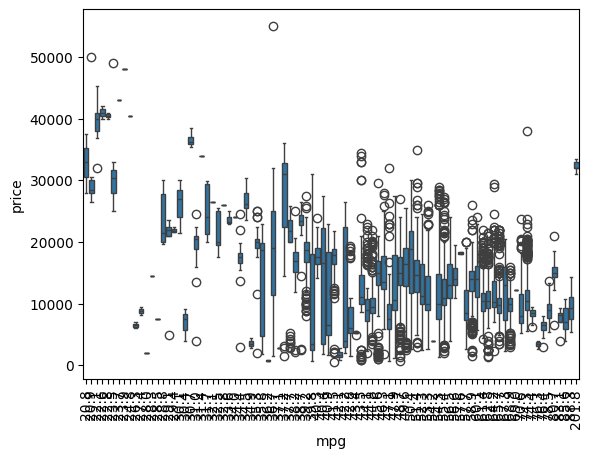

In [28]:
sns.boxplot(x=df['mpg'] , y = df['price'])
plt.xticks(rotation=90)

 By above we chose features for prediction

 1.model - > Ford Car Brands (Use) <br>
 2.year - >Production Year  (Use)<br>
 3.price - >Price of car in $ <br>
 4.transmission - > Automatic,Manual, Semi-Auto  (Disputed or may be)<br>
 5.mileage -> Number of miles traveled (Use) <br>
 6.fuel_Type -> Petrol,Diesel,Hybrid,Electric Other (Use) <br>
 7.tax -> Annual Tax  <br>
 8.mpg - > Miles per Gallon  <br>
 9.engineSize - > Car's Engine Size (Use)<br>

In [29]:
X = df.drop(columns = ['price'])
Y = df['price']


In [30]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [31]:
Y

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17961,8999
17962,7499
17963,9999
17964,8299


In [32]:
X_one_encoded = pd.get_dummies(X , columns = ['model' , 'transmission' , 'fuelType'] , drop_first = True)
X_one_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [33]:
X_one_encoded = X_one_encoded.astype(int)
X_one_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

columns = ['model' , 'transmission' , 'fuelType']

Xlable = X.copy()

for i in columns:
  Xlable[i] = encode.fit_transform(Xlable[i])


In [44]:
Xlable


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [45]:
Xlable['model'].value_counts()

,count
model,
5,6557
6,4588
13,2225
2,1143
1,543
12,531
14,526
0,355
18,296


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['year' , 'mileage' , 'tax' , 'mpg' , 'engineSize']

X_one_encoded[numerical_cols] = scaler.fit_transform(X_one_encoded[numerical_cols])
X_one_encoded

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [52]:
Xlable.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [53]:
Cols = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']
Xlable[Cols] = scaler.fit_transform(Xlable[Cols])
Xlable

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


# **So in Xlabel there is Label Encoding and X_one_encode there is one-hot-encoding**

Perform Regresssion on One-Hot-Label Encoded Data


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

X_train , X_test , y_train , y_test = train_test_split(X_one_encoded , Y , test_size = 0.33 , random_state=42)


In [55]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226])

In [58]:
y_test

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790
...,...
6015,19000
10301,10940
15006,21999
5396,6995


In [63]:
# R^2 value is use to compare the predicted and actual values
r2 = r2_score(y_test , y_pred)
print("R^2: " , r2)

R^2:  0.8396626991294073


In [62]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2)*(n - 1))/(n - p - 1)
print("Adjusted R^2: " , adjusted_r2)

Adjusted R^2:  0.8387377808685318


Perform regression on Label Encoding Data

In [64]:
X_train , X_test , y_train , y_test = train_test_split(Xlable , Y , test_size = 0.33 , random_state=42)


In [65]:
model2 = LinearRegression()
model2.fit(X_train , y_train)

LinearRegression()

In [66]:
y_pred = model2.predict(X_test)

In [67]:
y_pred

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235])

In [68]:
y_test

,price
17610,6995
7076,8999
1713,7998
1611,5491
16830,3790
...,...
6015,19000
10301,10940
15006,21999
5396,6995


In [69]:
r2 = r2_score(y_test , y_pred)
print("R^2: " , r2)

R^2:  0.7310215557391141


In [70]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2)*(n - 1))/(n - p - 1)
print("Adjusted R^2: " , adjusted_r2)

Adjusted R^2:  0.7306580713549777
